# Evaluation

In diesem Teil müssen wir ein lineares Regressionsmodell (`model.ipynb`) schätzen, das die Popularität von Titeln auf der Grundlage ihrer Lautstärke vorhersagt. In der endgültigen Version des Projekts werde ich weitere Faktoren hinzufügen.

# Bibliotheken

Zuerst müssen wir die Bibliotheken importieren:

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, confusion_matrix

# Daten importieren

Als nächstes laden wir die Daten:

In [7]:
spotify_data = pd.read_excel('spotify.xlsx')

# 4.1 Felderbestimmung

Im Moment berücksichtigt das Modell nur das Feld `loudness`, was für ein solches Modell sicherlich nicht ausreicht. Daher werde ich nur die Korrelation des Feldes `track_popularity` mit den anderen Feldern berechnen, um das Projekt in Zukunft anzupassen:

Korrelation mit track_popularity:
track_popularity    1.000000
loudness            0.083132
tempo               0.016659
mode                0.014359
liveness            0.004202
key                 0.001024
danceability       -0.002220
valence            -0.006478
energy             -0.007536
acousticness       -0.016960
instrumentalness   -0.063107
duration_ms        -0.066444
time_signature     -0.114827
speechiness        -0.137957
Name: track_popularity, dtype: float64


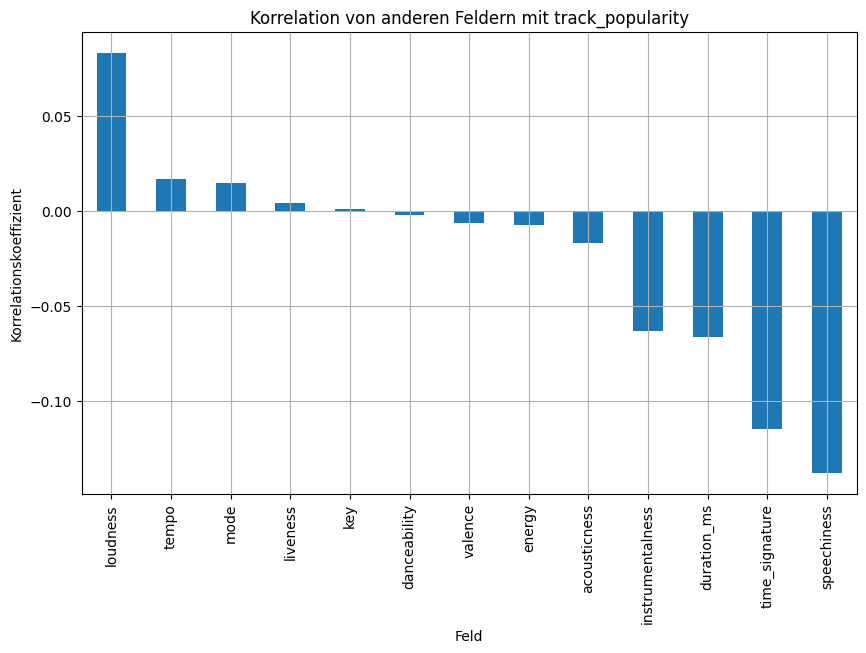

In [8]:
numerical_cols = ['energy', 'tempo', 'danceability', 'loudness', 'liveness', 'valence', 
				'time_signature', 'speechiness', 'instrumentalness', 'mode', 'key', 
				'duration_ms', 'acousticness', 'track_popularity']

correlation_matrix = spotify_data[numerical_cols].corr()
correlations_with_popularity = correlation_matrix['track_popularity'].sort_values(ascending=False)

print("Korrelation mit track_popularity:")
print(correlations_with_popularity)

# Visualisierung von Korrelationen
plt.figure(figsize=(10, 6))
correlations_with_popularity.drop('track_popularity').plot(kind='bar')
plt.title('Korrelation von anderen Feldern mit track_popularity')
plt.xlabel('Feld')
plt.ylabel('Korrelationskoeffizient')
plt.grid(True)
plt.show()

### 4.1 Fazit

Ich habe die Korrelation zwischen Lautheit und Popularität eines Titels schon einmal berechnet (in `data_description.ipynb`), was mit niedrigen Ergebnissen endete. Daher ist es wahrscheinlich, dass ich in einer verbesserten Version Felder wie `energy` oder `danceability` bevorzugen werde, da dies das Modell letztendlich verbessern wird.

## 4.2 Auswählen und Berechnen der Modellmetrik

Zur Schätzung eines linearen Regressionsmodells eignet sich die R^2-Metrik, die angibt, in wie vielen Fällen das Modell eine korrekte Vorhersage trifft.

Wir trainieren das Modell erneut und berechnen R^2:

In [9]:
# Partitionierung von Daten
x = spotify_data[['loudness']]
y = spotify_data['track_popularity']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Training des Modells
model = LinearRegression()
model.fit(x_train, y_train)

# Vorhersage
y_pred = model.predict(x_test)

# Berechnung von R^2
r2 = r2_score(y_test, y_pred)
print(f"R^2 des Modelles: {r2:.2f}")

R^2 des Modelles: 0.01


### 4.2 Fazit.

Im Modell betrug R^2 nur 0,01, was bestätigt, dass das Modell nur 1% der `track_populartiy` erklärt.

## 4.3 Fehlermatrix

Da `track_popularity` eine nicht-binäre Variable ist und die Fehlermatrix nur auf binäre Werte anwendbar ist, setzen wir den Medianwert\* von `track_popularity` ein und prüfen, ob der Wert kleiner als 0 und grösser als 1 ist.
\* - Der Medianwert auf der Grundlage von `data_description.ipynb` ist 75.

In [10]:
# Medianwert
threshold = 75

# Nicht-binär -> binär
y_test_class = (y_test > threshold).astype(int)
y_pred_class = (y_pred > threshold).astype(int)

# Fehlermatrix
cm = confusion_matrix(y_test_class, y_pred_class)
print("Fehlermatrix:")
print(cm)

# Berechnung von Sensitivität (recall) und Spezifität (precision)
tn, fp, fn, tp = cm.ravel()
recall = tp / (tp + fn)
precision = tn / (tn + fp)

print(f"Sensitivität (recall): {recall:.2f}")
print(f"Spezifität (precision): {precision:.2f}")

Fehlermatrix:
[[ 15 172]
 [  3 148]]
Sensitivität (recall): 0.98
Spezifität (precision): 0.08


### 4.3 Fazit

Da unser Schwellenwert der Median (d. h. 75) ist, ergibt sich daraus ein Gleichgewicht. Die Fehlermatrix zeigt die Verteilung der gültigen und ungültigen Vorhersagen. Sensitivität (recall) misst den Anteil der korrekt vorhergesagten „sehr beliebten“ Titel (>75), während Spezifität (precision) den Anteil der korrekt vorhergesagten „weniger beliebten“ Titel misst. Der niedrige R^2 deutete bereits an, dass die Genauigkeit extrem niedrig sein würde, aber am Ende war es dann doch so.

## 4.4 Ergebnisse

Unser Modell hat einen R^2 = 0,01, was bedeutet, dass die `loudness` nur 1% der `track_popularity` erklärt. Die Fehlermatrix und die Klassifizierungsmetriken bestätigen dies ebenfalls. Das liegt wahrscheinlich einfach daran, dass die Popularität von Tracks von vielen Faktoren abhängt, die (im Moment) nicht im Modell enthalten sind. Ursprünglich habe ich diesen Bereich gewählt, weil ich schon oft gehört habe, dass Musik mit jeder Generation lauter, lauter, lauter und lauter wird. Ich dachte, dass die Lautstärke eines der Merkmale beliebter Titel sei, aber es stellte sich heraus, dass es nicht ganz so einfach ist. Also werde ich mein Modell noch vor Ablauf der Abgabe verbessern, indem ich weitere Felder hinzufüge.